In [1]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow-hub


Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import pathlib

C:\Users\Atharva\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
Image_Shape = (224,224)

In [5]:
URL_dataset = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [6]:
data_dir = tf.keras.utils.get_file(origin = URL_dataset, fname='flower_photos' ,untar= True)

In [7]:
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [8]:
'''data_dir = pathlib.Path(data_dir)
file_list = list(data_dir.glob('*/*.jpg'))
half_file_list = file_list[:len(file_list) // 2]
#image_count = len(list(data_dir.glob('*/*.jpg')))
image_count = len(half_file_list)
print(image_count)'''

"data_dir = pathlib.Path(data_dir)\nfile_list = list(data_dir.glob('*/*.jpg'))\nhalf_file_list = file_list[:len(file_list) // 2]\n#image_count = len(list(data_dir.glob('*/*.jpg')))\nimage_count = len(half_file_list)\nprint(image_count)"

In [9]:
flowers_images_dict = {"daisy" : list(data_dir.glob('daisy/*')),
                      "dandelion" : list(data_dir.glob('dandelion/*')),
                      "roses" : list(data_dir.glob('roses/*')),
                      "sunflowers" : list(data_dir.glob('sunflowers/*')),
                      "tulips" : list(data_dir.glob('tulips/*'))}

flowers_labels_dict = {"daisy" : 0,
                       "dandelion" : 1,
                       "roses" : 2,
                       "sunflowers" : 3,
                       "tulips" : 4}

X, Y = [],[]

for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, Image_Shape)
    X.append(resized_img)
    Y.append(flowers_labels_dict[flower_name])
X = np.array(X)
Y = np.array(Y)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=0)
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [12]:
tf_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [13]:
classifier = tf.keras.Sequential([hub.KerasLayer(tf_model, input_shape = (224,224,3), trainable=False),
tf.keras.layers.Dense(len(flowers_labels_dict), activation = "softmax")])

In [14]:
classifier.summary()
classifier.compile(optimizer="adam",
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [15]:
classifier.fit(X_train_scaled, Y_train, epochs = 5)
#classifier.evaluate(X_test_scaled, Y_test)

Epoch 1/5


C:\Users\Atharva\anaconda3\lib\site-packages\keras\src\backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


86/86 [==============================] - 33s 344ms/step - loss: 0.7866 - accuracy: 0.7115
Epoch 2/5
86/86 [==============================] - 30s 350ms/step - loss: 0.4148 - accuracy: 0.8594
Epoch 3/5
86/86 [==============================] - 31s 363ms/step - loss: 0.3268 - accuracy: 0.8921
Epoch 4/5
86/86 [==============================] - 30s 351ms/step - loss: 0.2715 - accuracy: 0.9142
Epoch 5/5
86/86 [==============================] - 31s 361ms/step - loss: 0.2354 - accuracy: 0.9248


In [62]:
classifier.evaluate(X_test_scaled, Y_test)

29/29 [==============================] - 11s 386ms/step - loss: 0.3800 - accuracy: 0.8617


[0.38002368807792664, 0.8616557717323303]

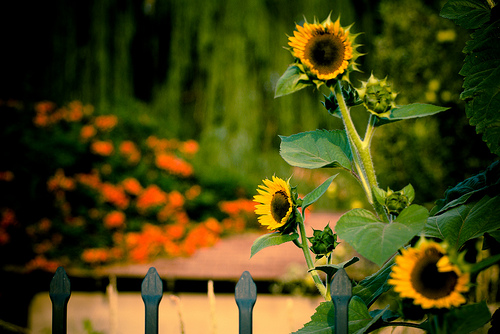

In [79]:
import random
from PIL import Image
import os

# Path to the directory containing flower images
flowers_dir = r"C:\Users\Atharva\OneDrive\Desktop\6\flower_photos\flower_photos"

# List of flower categories
flower_categories = ["daisy", "dandelion", "roses", "sunflowers", "tulips"]

# Randomly select a flower category
random_category = random.choice(flower_categories)

# Get a list of image files in the selected category
image_files = os.listdir(os.path.join(flowers_dir, random_category))

# Randomly select an image file from the category
random_image_file = random.choice(image_files)

# Construct the full path to the selected image
image_path = os.path.join(flowers_dir, random_category, random_image_file)

# Open the random image
img = Image.open(image_path)

# Display the image
img

#from PIL import Image
#img = Image.open("/content/roses3.jpg")		#for colab use this command
#img                 


In [80]:
img = tf.keras.preprocessing.image.img_to_array(img.resize(Image_Shape))
img = np.array([img])

In [81]:
res = classifier.predict(img)

1/1 [==============================] - 0s 29ms/step


In [82]:
print("The prediction is : {}".format(list(flowers_labels_dict.keys())[np.argmax(res)]))



The prediction is : daisy


In [83]:
import os
os.getcwd()


'C:\\Users\\Atharva'